This is a notebook for looking at AGC749237 data. This is a SHIELD galaxy; based on SFR, may expect to (just) detect radio continuum. Otherwise, upper limit is useful. Hope to put this in TOP proposal.

In [1]:

#load apercal automatically, not needing to specify my username/path directly
import os;
myusername = os.environ['USER']
if not ('PYTHONPATH' in os.environ and
        '/home/' + myusername + '/apercal' in os.environ['PYTHONPATH']):
      print("WARNING: your apercal directory should be in the $PYTHONPATH")

In [2]:
#set up logging
%config IPCompleter.greedy=True
%matplotlib notebook
import libs.lib as lib
lib.setup_logger('info', logfile='/home/{}/apertif/DATA/logs/AGC749237.log'.format(myusername))

/home/apercal/pipeline/local/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa
root - INFO : Logging started!
root - INFO : To see the log in a bash window use the following command:
root - INFO : tail -n +1 -f /home/adams/apertif/DATA/logs/AGC749237.log


Setup logger with lib.setup_logger()


In [3]:
import apercal

In [4]:
cfgfile ='/home/adams/apertif/DATA/cfg/AGC749237.cfg'

In [5]:
prepare = apercal.prepare(cfgfile)
prepare.show()

PREPARE - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


PREPARE
	prepare_obsdir_fluxcal = /data/apertif/180409001_3C147/
	prepare_obsdir_polcal = 
	prepare_obsdir_target = /data/apertif/180409002_AGC749237/
	prepare_obsmode = single_element


In [6]:
prepare.go()

PREPARE - INFO : ########## Preparing data for calibration ##########
PREPARE - INFO : ### Flux calibrator dataset found. Copying beam 00 to working directory. ###
PREPARE - WARNING : ### No polarisation calibrator dataset specified. The next steps might not work! ###
PREPARE - INFO : ### 37 different beams for target field found. ###
PREPARE - INFO : ### Copying central element beam to working directory. ###
PREPARE - INFO : ### Target dataset(s) copied to working directories! ###
PREPARE - INFO : ########## Data prepared for calibration ##########


Inspected calibrator in plotms and it looks good

In [7]:
preflag = apercal.preflag(cfgfile)
preflag.show()

PREFLAG
	preflag_manualflag = True
	preflag_manualflag_fluxcal = True
	preflag_manualflag_polcal = False
	preflag_manualflag_target = True
	preflag_manualflag_auto = True
	preflag_manualflag_antenna = 
	preflag_manualflag_corr = 
	preflag_manualflag_shadow = True
	preflag_manualflag_baseline = 
	preflag_manualflag_channel = 
	preflag_manualflag_time = 
	preflag_aoflagger = True
	preflag_aoflagger_bandpass = True
	preflag_aoflagger_fluxcal = True
	preflag_aoflagger_polcal = False
	preflag_aoflagger_target = True
	preflag_aoflagger_fluxcalstrat = fluxcal.rfis
	preflag_aoflagger_polcalstrat = 
	preflag_aoflagger_targetstrat = target.rfis


In [8]:
#setup to flag channels with ghosts and subband edges
nchannel = 11008
a = range(0, nchannel, 64) # the subband edges
b = range(1, nchannel, 64)
c = range(63, nchannel, 64)
d = range(16, nchannel, 64) # the two ghosts
e = range(48, nchannel, 64)

l = a + b + c + d + e
preflag.preflag_manualflag_channel = ';'.join(str(ch) for ch in l)

preflag.show()


PREFLAG
	preflag_manualflag = True
	preflag_manualflag_fluxcal = True
	preflag_manualflag_polcal = False
	preflag_manualflag_target = True
	preflag_manualflag_auto = True
	preflag_manualflag_antenna = 
	preflag_manualflag_corr = 
	preflag_manualflag_shadow = True
	preflag_manualflag_baseline = 
	preflag_manualflag_channel = 0;64;128;192;256;320;384;448;512;576;640;704;768;832;896;960;1024;1088;1152;1216;1280;1344;1408;1472;1536;1600;1664;1728;1792;1856;1920;1984;2048;2112;2176;2240;2304;2368;2432;2496;2560;2624;2688;2752;2816;2880;2944;3008;3072;3136;3200;3264;3328;3392;3456;3520;3584;3648;3712;3776;3840;3904;3968;4032;4096;4160;4224;4288;4352;4416;4480;4544;4608;4672;4736;4800;4864;4928;4992;5056;5120;5184;5248;5312;5376;5440;5504;5568;5632;5696;5760;5824;5888;5952;6016;6080;6144;6208;6272;6336;6400;6464;6528;6592;6656;6720;6784;6848;6912;6976;7040;7104;7168;7232;7296;7360;7424;7488;7552;7616;7680;7744;7808;7872;7936;8000;8064;8128;8192;8256;8320;8384;8448;8512;8576;8640;8704;8768;883

In [9]:
preflag.manualflag()

In [10]:
#skip the bandpass step because I don't think it's important with the flagging of subband edges
#curious to see if this will work
#nope - ran much too fast

#this applies a rough bandpass to make sure flagging doesn't take out bandpass shape/effects
preflag.aoflagger_bandpass()

TypeError: a float is required

In [11]:
#and now run aoflagger to get RFI
preflag.aoflagger_flag()

In [12]:
#inspected in rfigui briefly and looks good, so move on
convert = apercal.convert(cfgfile)
convert.show()

CONVERT - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONVERT
	convert_ms2uvfits = True
	convert_ms2uvfits_tool_casa_autocorr = False
	convert_uvfits2mir = True
	convert_fluxcal = True
	convert_polcal = False
	convert_target = True


In [13]:
convert.go()

CONVERT - INFO : ########## FILE CONVERSION started ##########
CONVERT - INFO : ### Starting conversion from MS to UVFITS format ###
CONVERT - INFO : ### Converted MS file 3C147.MS to UVFITS format! ###
CONVERT - INFO : ### Converted MS file /data/adams/apertif/AGC749237/00/raw/AGC749237.MS to UVFITS format! ###
CONVERT - INFO : ### Conversion from MS to UVFITS format done! ###
CONVERT - INFO : ### Starting conversion from UVFITS to MIRIAD format ###
CONVERT - INFO : ### Converted UVFITS file 3C147.MS to MIRIAD format! ###
CONVERT - INFO : ### Converted UVFITS file /data/adams/apertif/AGC749237/00/crosscal/AGC749237.UVFITS to MIRIAD format! ###
CONVERT - INFO : ### Conversion from UVFITS to MIRIAD format done! ###
CONVERT - INFO : ########## FILE CONVERSION done ##########


In [14]:
ccal = apercal.ccal(cfgfile)
ccal.show()

CROSSCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CROSSCAL
	crosscal_bandpass = True
	crosscal_delay = True
	crosscal_polarisation = False
	crosscal_transfer_to_target = True


In [15]:
ccal.go()

CROSSCAL - INFO : ########## Starting CROSS CALIBRATION ##########
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data started ###
CROSSCAL - INFO : ### Bandpass calibration on the flux calibrator data done ###
CROSSCAL - INFO : ### No polarisation calibration done! ###
CROSSCAL - INFO : ### Copying calibrator solutions to target dataset ###
CROSSCAL - INFO : # Copying calibrator solutions (bandpass, gains) from flux calibrator #
CROSSCAL - INFO : # Polarisation calibration solutions (leakage, angle) not found #
CROSSCAL - INFO : # Copying calibrator solutions to 1 beams! #
CROSSCAL - INFO : # Calibrator solutions copied to beam 00! #
CROSSCAL - INFO : ### All solutions copied to target data set(s) ###
CROSSCAL - INFO : ########## CROSS CALIBRATION done ##########


In [16]:
scal = apercal.scal(cfgfile)

#Based on previous experience with UGC8261, I will start with amplitude selfcal
#I will then check my fluxes against NVSS in the end
scal.selfcal_parametric = True
scal.selfcal_parametric_amp = True
scal.selfcal_standard_amp = True

scal.show()

SELFCAL - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


SELFCAL
	selfcal_image_imsize = 2049
	selfcal_image_cellsize = 4
	selfcal_splitdata = True
	selfcal_splitdata_chunkbandwidth = 0.02
	selfcal_splitdata_channelbandwidth = 0.001
	selfcal_flagantenna = 
	selfcal_flagline = True
	selfcal_flagline_sigma = 0.5
	selfcal_parametric = True
	selfcal_parametric_skymodel_radius = 0.5
	selfcal_parametric_skymodel_cutoff = 0.8
	selfcal_parametric_skymodel_distance = 30
	selfcal_parametric_solint = 10
	selfcal_parametric_uvmin = 0.5
	selfcal_parametric_uvmax = 1000
	selfcal_parametric_amp = True
	selfcal_standard_majorcycle = 3
	selfcal_standard_majorcycle_function = square
	selfcal_standard_minorcycle = 5
	selfcal_standard_minorcycle_function = square
	selfcal_standard_c0 = 10.0
	selfcal_standard_c1 = 5.0
	selfcal_standard_minorcycle0_dr = 3.0
	selfcal_standard_drinit = 25
	selfcal_standard_dr0 = 2.0
	selfcal_standard_nsigma = 50
	selfcal_standard_uvmin = [0.0, 0.0, 0.0]
	selfcal_standard_uvmax = [3000, 3000, 3000]
	selfcal_standard_solint = [5, 3, 

In [17]:
scal.go()

SELFCAL - INFO : ########## Starting SELF CALIBRATION ##########
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal #
SELFCAL - INFO : ### Splitting of target data into individual frequency chunks started ###
SELFCAL - INFO : # Applying calibrator solutions to target data before averaging #
SELFCAL - INFO : # Calibrator solutions to target data applied #
SELFCAL - INFO : # Found 1 subband(s) in target data #
SELFCAL - INFO : # Started splitting of subband 0 #
SELFCAL - INFO : # Adjusting chunk size to 0.016796875 GHz for regular gridding of the data chunks over frequency #
SELFCAL - INFO : # Starting splitting of data chunk 0 for subband 0 #
SELFCAL - INFO : # Increasing frequency bin of data chunk 0 to keep bandwidth of chunks equal over the whole bandwidth #
SELFCAL - INFO : # New frequency bin is 0.0010498046875 GHz #
SELFCAL - INFO : # Creating directory /data/adams/apertif/

SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/02/pm #
root - INFO : ### Using standard WSRT beam for calculating apparent fluxes! ###
root - INFO : ### Field seems to have a flux of 0.27970044911377434 Jy ###
root - INFO : ### Found 9 source(s) in the model at a cutoff of 80.0 percent with a total flux of 0.22698664200520852 Jy ###
root - INFO : ### Wrote source textfile to /data/adams/apertif/AGC749237/00/selfcal/02/pm/model.txt! ###
SELFCAL - INFO : # Creating model from textfile model.txt for chunk 02 #
SELFCAL - INFO : # Doing parametric self-calibration on chunk 02 with solution interval 10 min and uvrange limits of 0.5~1000 klambda #
SELFCAL - INFO : # Parametric self calibration routine on chunk 02 done! #
SELFCAL - INFO : # Starting parametric self calibration routine on chunk 03 #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal/03 #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/03/

SELFCAL - INFO : # Mask with threshold 0.02409982442855835 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.00481996488571167 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.022516519 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0004056721 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010711033079359266 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010711033079359266 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0

SELFCAL - INFO : # RMS of the residual image is 0.00034557658 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 00 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.002772824624005486 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.002772824624005486 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.0005545649248010972 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0025408424 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00034545147 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 00 fi

SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.00596744179725647 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/4 was set to 0.001193488359451294 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.005207067 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003789756 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 01 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=5 minutes for major cycle 00 #
SELFCAL - INFO : # Major self-calibration cycle 0 for frequency chunk 01 finished #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 01 started #
SELFCAL - INFO : # Creating directory /data/ad

SELFCAL - INFO : # Peak of the residual image is 0.002296297 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00043310944 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 01 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 01 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/3 set to 0.0018836397171020508 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0018836397171020508 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/3 was set to 0.00037672794342041014 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/3 created #
SELFCAL - INFO : # Peak of the residual image is 0.0020696167 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00042771737 Jy/beam #
S

SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.004887048 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00032708514 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 02 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 02 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/1 set to 0.0055546771778779876 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0055546771778779876 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/1 was set to 0.0011109354355755975 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL

SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0017831607 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00037702624 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 02 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=0.5 minutes for major cycle 02 #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 02 finished #
SELFCAL - INFO : # Standard self-calibration routine for chunk 02 finished #
SELFCAL - INFO : # Starting standard self-calibration routine on frequency chunk 03 #
SELFCAL - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/selfcal/03 #
SELFCAL - INFO : # Theoretical noise for chunk 03 is 3.58e-05 Jy/beam #
SELFCAL - INFO : # Your theoretical noise threshold will be 50 times the theoretical noise corresponding to 0.00179 Jy/beam #
SELFCAL - INFO : # Your dynamic range limits are set

SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.0045899153 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00029985805 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 03 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 03 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/3 set to 0.0037977989196777344 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0037977989196777344 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/3 was set to 0.0007595597839355468 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/3 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/3 created #
SELFCAL - INFO : # 

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/0 was set to 0.01006540060043335 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.022218533 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033430784 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 04 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/1 set to 0.09662784576416016 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.09662784576416016 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/1 was set to 0.019325569152832033 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/1 cleaning 

SELFCAL - INFO : # Major/minor cycle 1/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.002679547 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0002695274 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 04 finished #
SELFCAL - INFO : # Doing self-calibration with uvmin=0.0, uvmax=3000, solution interval=3 minutes for major cycle 01 #
SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 04 finished #
SELFCAL - INFO : # Major self-calibration cycle 2 for frequency chunk 04 started #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/04/02 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 2 are [50.0, 53.125, 62.5, 78.125, 100.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 04 started #
SELFCA

SELFCAL - INFO : # Clean threshold at major/minor cycle 0/2 was set to 0.004817264556884766 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 0/2 created #
SELFCAL - INFO : # Peak of the residual image is 0.022249777 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003068778 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 0/3 set to 0.010705032348632813 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.010705032348632813 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 0/3 was set to 0.0021410064697265628 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 0/3 cleani

SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/1 set to 0.0028212496813605813 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.0028212496813605813 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/1 was set to 0.0005642499362721162 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/1 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0034211725 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0008075866 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 05 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequenc

SELFCAL - INFO : # Major self-calibration cycle 1 for frequency chunk 06 started #
SELFCAL - INFO : # Creating directory /data/adams/apertif/AGC749237/00/selfcal/06/01 #
SELFCAL - INFO : # The minor cycle dynamic range limits for major cycle 1 are [25.0, 26.5625, 31.25, 39.0625, 50.0] #
SELFCAL - INFO : # Minor self-calibration cycle 0 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/0 set to 0.00730539932847023 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Noise threshold #
SELFCAL - INFO : # Mask from last minor iteration of last major cycle copied #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/0 was set to 0.001461079865694046 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/0 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/0 created #
SELFCAL - INFO : # Peak of the residual image is 0.0043311305 Jy/beam #
SELFCAL - INFO : # RMS o

SELFCAL - INFO : # Peak of the residual image is 0.002005984 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00033032786 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 3 for frequency chunk 06 finished #
SELFCAL - INFO : # Minor self-calibration cycle 4 for frequency chunk 06 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 2/4 set to 0.0017899999999999997 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Theoretical noise threshold #
SELFCAL - INFO : # Mask with threshold 0.0017899999999999997 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 2/4 was set to 0.0003579999999999999 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 2/4 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Residual image for major/minor cycle 2/4 created #
SELFCAL - INFO : # Peak of the residual image is 0.0018943272 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.0003289699 Jy/beam #

SELFCAL - INFO : # Cleaned image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/1 created #
SELFCAL - INFO : # Peak of the residual image is 0.0048538437 Jy/beam #
SELFCAL - INFO : # RMS of the residual image is 0.00023035618 Jy/beam #
SELFCAL - INFO : # Minor self-calibration cycle 1 for frequency chunk 07 finished #
SELFCAL - INFO : # Minor self-calibration cycle 2 for frequency chunk 07 started #
SELFCAL - INFO : # Mask threshold for major/minor cycle 1/2 set to 0.004617100238800049 Jy/beam #
SELFCAL - INFO : # Mask threshold set by Dynamic range threshold #
SELFCAL - INFO : # Mask with threshold 0.004617100238800049 Jy/beam created #
SELFCAL - INFO : # Clean threshold at major/minor cycle 1/2 was set to 0.0009234200477600098 Jy/beam #
SELFCAL - INFO : # Major/minor cycle 1/2 cleaning done #
SELFCAL - INFO : # Cleaned image for major/minor cycle 1/2 created #
SELFCAL - INFO : # Residual image for major/minor cycle 1/2 created #
SELFCAL 

In [5]:
continuum = apercal.continuum(cfgfile)
continuum.show()

CONTINUUM - INFO : ### Configuration file /home/adams/apertif/DATA/cfg/AGC749237.cfg successfully read! ###


CONTINUUM
	continuum_image_imsize = 2049
	continuum_image_cellsize = 4
	continuum_image_centre = 
	continuum_image_restorbeam = 
	continuum_image_convolbeam = 40,40,0.0
	continuum_mode = stack
	continuum_majorcycle_function = square
	continuum_minorcycle_function = square
	continuum_minorcycle0_dr = 3.0
	continuum_minorcycle = 5
	continuum_c0 = 10.0
	continuum_c1 = 5.0
	continuum_drinit = 25
	continuum_dr0 = 2.0
	continuum_nsigma = 30
	continuum_robust = 


In [6]:
continuum.go()

CONTINUUM - INFO : ########## Starting CONTINUUM IMAGING ##########
CONTINUUM - INFO : ### Starting deep continuum imaging of full dataset ###
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum #
CONTINUUM - INFO : ### Creating individual deep images from frequency chunks ###
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack #
CONTINUUM - INFO : ### Continuum imaging for chunk 00 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/00 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/00 #
CONTINUUM - INFO : # Theoretical noise for chunk 00 is 3.58e-05 Jy/beam #
CONTINUUM - INFO :

CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 4 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 4 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 4 created #
CONTINUUM - INFO : # Residual image for minor cycle 4 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0012140835 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00030115902 Jy/beam #
CONTINUUM - INFO : ### Continuum imaging for chunk 01 successful ###
CONTINUUM - INFO : ### Continuum imaging for chunk 02 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/02 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/02 #
CONTINUUM - INFO : # Theoretical noise for chunk 02 is 3.58e-05 Jy/beam #
CONTINUUM - INFO : 

CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 4 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 4 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 4 created #
CONTINUUM - INFO : # Residual image for minor cycle 4 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0011485526 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00027757816 Jy/beam #
CONTINUUM - INFO : ### Continuum imaging for chunk 03 successful ###
CONTINUUM - INFO : ### Continuum imaging for chunk 04 started ###
CONTINUUM - INFO : # Last major self-calibration cycle seems to have been 3 #
CONTINUUM - INFO : # Creating directory /data/adams/apertif/AGC749237/00/continuum/stack/04 #
CONTINUUM - INFO : # Moved to directory /data/adams/apertif/AGC749237/00/continuum/stack/04 #
CONTINUUM - INFO : # Theoretical noise for chunk 04 is 3.58e-05 Jy/beam #
CONTINUUM - INFO : 

CONTINUUM - INFO : # Clean threshold for minor cycle 2 was set to 0.00023424034118652346 Jy/beam #
CONTINUUM - INFO : # Minor cycle 2 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 2 created #
CONTINUUM - INFO : # Residual image for minor cycle 2 created #
CONTINUUM - INFO : # Peak of the residual image is 0.0010424757 Jy/beam #
CONTINUUM - INFO : # RMS of the residual image is 0.00019807559 Jy/beam #
CONTINUUM - INFO : # Mask threshold for final imaging minor cycle 3 set to 0.0010739999999999999 Jy/beam #
CONTINUUM - INFO : # Mask threshold set by Theoretical noise threshold #
CONTINUUM - INFO : # Mask with threshold 0.0010739999999999999 Jy/beam created #
CONTINUUM - INFO : # Clean threshold for minor cycle 3 was set to 0.00021479999999999996 Jy/beam #
CONTINUUM - INFO : # Minor cycle 3 cleaning done #
CONTINUUM - INFO : # Cleaned image for minor cycle 3 created #
CONTINUUM - INFO : # Residual image for minor cycle 3 created #
CONTINUUM - INFO : # Peak of the resi

rms noise is ~ 0.2 mJy
There may be something there at ~3sigma. Which is a useful limit.
And it's right on top of HI, so it looks good! Will contact John about an Halpha/FUV image. And then it's even more on top! Woohoo!
Can I plot here in line?

In [8]:

#first, need to primary beam correct continuum image (comparison to NVSS) and export to fits:
linmos = lib.miriad('linmos')
linmos.in_ = '/data/adams/apertif/AGC749237/00/continuum/AGC749237_stack'
linmos.cutoff = 0.3
linmos.out = '/data/adams/apertif/AGC749237/AGC749237_RC'
linmos.go()


['',
 'linmos: Revision 1.32, 2016/03/18 02:55:49 UTC',
 '',
 'WARNING: Setting RMS to 1.0 for all images.',
 'Processing image /data/adams/apertif/AGC749237/00/continuum/AGC749237_stack']

In [9]:
#Now get a fits image so that I can plot and do fun things:
fits = lib.miriad('fits')
fits.in_ = '/data/adams/apertif/AGC749237/AGC749237_RC'
fits.op = "xyout"
fits.out = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
fits.go()

['', 'fits: Revision 1.32, 2014/09/15 04:39:01 UTC', '']

In [16]:
#load my python modules - colors!
import sys
sys.path.append('/home/adams/python')
import colors
import aplpy
#Yay! There is aplpy

import numpy as np
import matplotlib.pyplot as plt

cm_rainbow=colors.get_colormap("rainbow")
cm_linear=colors.get_colormap("linear")

#to be able to use latex in image text
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [18]:
%matplotlib inline

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.991e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.344e-03 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


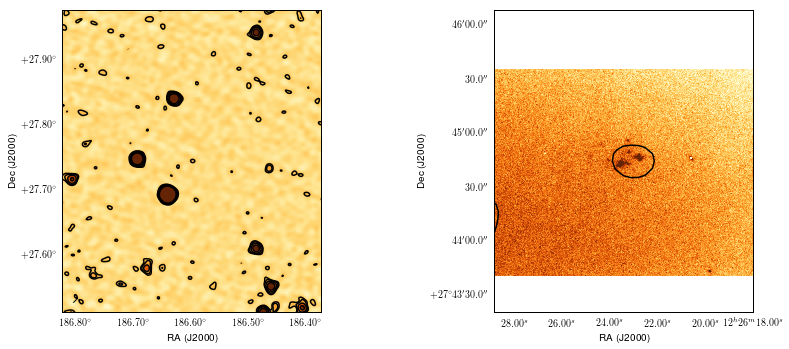

In [31]:
#Now I can work on plotting!
#Plus also comparing to NVSS

#First a quick plot: RC image,  plus Halpha image with RC overlay
#set coordinates of source:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear))
f1.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.02) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='black')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam(rcimage)
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
#f2.tick_labels.set_yformat('ddd.dd')
#f2.tick_labels.set_xformat('ddd.dd')
#f2.add_colorbar()
#f2.colorbar.show()
#f2.colorbar.set_axis_label_text(r'Jy')
#f2.colorbar.set_axis_label_font(size=18, weight='bold')



INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


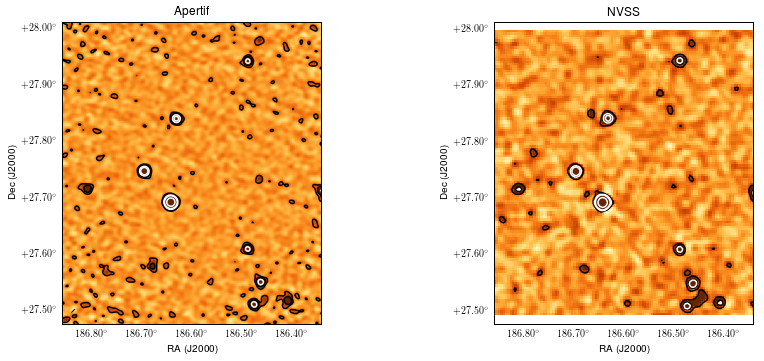

In [46]:
#Now look at NVSS vs Apertif data
#First just plot some comparisons
#Images for both, with contours from other
#Set contours at same absolute level

#Then would like to do a direct source comparison
#talk to Thijs about what he's done

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.005,0.01,0.05]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(12,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.3,0.7])
f1.recenter(ra,dec, radius=0.23) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.6,0.15,0.3,0.7])
f2.recenter(ra,dec, radius=0.23) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')



In [ ]:
#want to roughly get flux of source.
#Zoom in in kvis and do s to get max value - should be flux (peak flux is flux, I think/hope)
#answer is: 0.76 mJy, so almost 4sigm (3.8)

INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


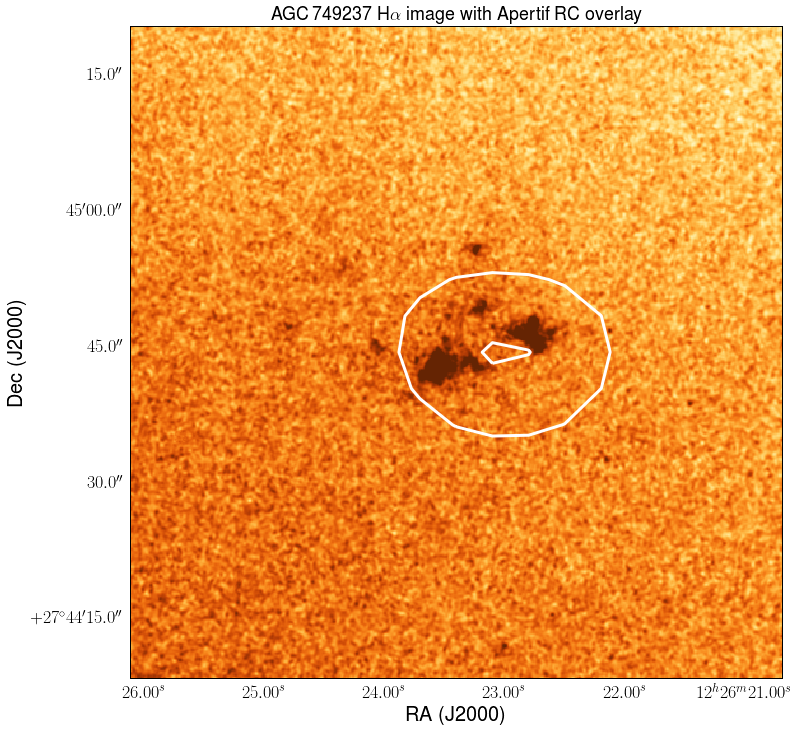

In [41]:
#make just a nice H-alpha RC overlay to focus on that

ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'


rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]

fig=plt.figure(figsize=(12,12))

f2=aplpy.FITSFigure(halpha,figure=fig,aspect='equal')
f2.recenter(ra,dec, radius=0.01) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear))
f2.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f2.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay',size=18)
f2.axis_labels.set_font(size=20)
f2.tick_labels.set_font(size=18)

plt.savefig('AGC749237_SF.png')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  6.684e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.439e+01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


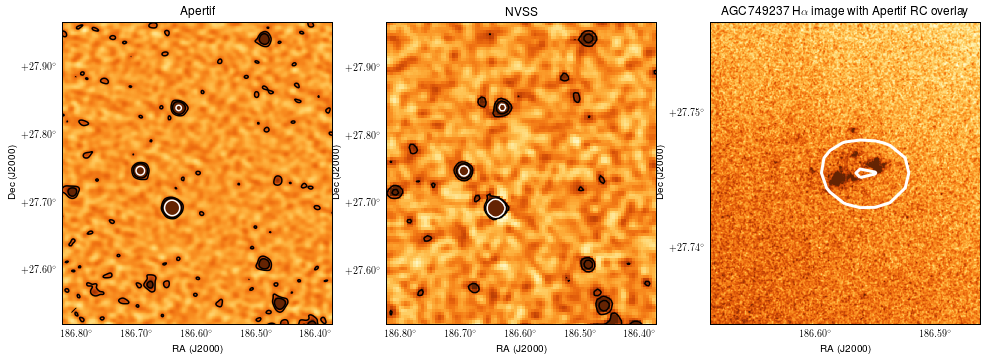

In [44]:
ra = 186.5975
dec = 27.7456

rcimage = '/data/adams/apertif/AGC749237/AGC749237_RC.fits'
halpha = '/data/adams/apertif/AGC749237/AGC749237_HA.reg.fits'
nvss = '/data/adams/apertif/AGC749237/AGC749237_NVSS.fits'

rc_contours = np.array([3,10]) * 0.2e-3 #0.2 mJy is noise

nvss_contours = np.array([3,10]) * 0.4e-3 #Rms in NVSS images is ~2x

contours = [0.01]  #start at 50 mJy and play with contours by hand

fig=plt.figure(figsize=(15,6))

f1=aplpy.FITSFigure(rcimage,figure=fig,aspect='equal',subplot=[0.1,0.15,0.25,0.7])
f1.recenter(ra,dec, radius=0.2) 
f1.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f1.show_contour(rcimage,levels=rc_contours,colors='black')
f1.show_contour(rcimage,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
f1.add_beam()
f1.beam.hide()
f1.beam.set_edgecolor('black')
f1.beam.set_facecolor('none')
f1.beam.show(facecolor='none')
f1.beam.set_hatch('///')
f1.tick_labels.set_yformat('ddd.dd')
f1.tick_labels.set_xformat('ddd.dd')
f1.set_title('Apertif')
#f1.add_colorbar()
#f1.colorbar.show()
#f1.colorbar.set_axis_label_text(r'Jy')
#f1.colorbar.set_axis_label_font(size=18, weight='bold')


f2=aplpy.FITSFigure(nvss,figure=fig,aspect='equal',subplot=[0.4,0.15,0.25,0.7])
f2.recenter(ra,dec, radius=0.2) 
f2.show_colorscale(cmap=plt.get_cmap(cm_linear),vmax=2e-3,vmin=-2e-3)
f2.show_contour(nvss,levels=nvss_contours,colors='black')
f2.show_contour(nvss,levels=contours,colors='white')
#f1.show_contour(cleanmask,levels=[0.5,],colors='gray',linewidth=3)
#f2.add_beam()
#f2.beam.hide()
#f2.beam.set_edgecolor('black')
#f2.beam.set_facecolor('none')
#f2.beam.show(facecolor='none')
#f2.beam.set_hatch('///')
f2.tick_labels.set_yformat('ddd.dd')
f2.tick_labels.set_xformat('ddd.dd')
f2.set_title('NVSS')

rc_contours = np.array([3,5,10,20]) * 0.2e-3 #0.2 mJy is noise

rc_contours = [0.0006,0.00075]



f3=aplpy.FITSFigure(halpha,figure=fig,aspect='equal',subplot=[0.7,0.15,0.25,0.7])
f3.recenter(ra,dec, radius=0.01) 
f3.show_colorscale(cmap=plt.get_cmap(cm_linear))
f3.show_contour(rcimage,levels=rc_contours,colors='white',linewidths=3)
f3.set_title(r'AGC\,749237 H$\alpha$ image with Apertif RC overlay')
#f3.axis_labels.set_font(size=20)
#f3.tick_labels.set_font(size=18)
f3.tick_labels.set_yformat('ddd.dd')
f3.tick_labels.set_xformat('ddd.dd')


plt.savefig('agc749237.png')

In [ ]:
#Now I would like to actually measure continuum sources
#Both for comparison but also because I want a good measure of the flux of my "detection"

#want to use PyBDSF